# Here is the background information on your task
 You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.

The insights from your analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.
-Below I have outlined your main tasks along with what we should be looking for in the data for each.

Examine transaction data – look for inconsistencies, missing data across the data set, outliers, correctly identified category items, numeric data across all tables. If you determine any anomalies make the necessary changes in the dataset and save it. Having clean data will help when it comes to your analysis.

Examine customer data – check for similar issues in the customer data, look for nulls and when you are happy merge the transaction and customer data together so it’s ready for the analysis ensuring you save your files along the way.

Data analysis and customer segments – in your analysis make sure you define the metrics – look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of our report to Julia.

Deep dive into customer segments – define your recommendation from your insights, determine which segments we should be targeting, if packet sizes are relative and form an overall conclusion based on your analysis.

Make sure you save your analysis in the CSV files and your visualisations – we will need them for our report. If you could work on this analysis and send me your initial findings by end of next week that would be great.

# Here is your task
We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review. However, to do so, we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.  

We have chosen to complete this task in R, however you will also find Python to be a useful tool in this piece of analytics. If you aren’t familiar with R or Python we would recommend searching a few online courses to help get you started. We have also provided an R solution template if you want some assistance in getting through this Task. Whilst its possible to complete the task in Excel you may find the size of the data and the nature of the tasks is such that it is more difficult to complete in Excel.  

To get started, download the resource csv data files below and begin performing high-level data checks such as:

Creating and interpreting high-level summaries of the data
Finding outliers and removing these (if applicable)
Checking data formats and correcting (if applicable)

You will also want to derive extra features such as pack size and brand name from the data and define metrics of interest to enable you to draw insights on who spends on chips and what drives spends for each customer segment. Remember, our end goal is to form a strategy based on the findings to provide a clear recommendation to Julia the Category Manager so make sure your insights can have a commercial application.

As we are in the early stages of this analysis Zilinka has asked us to submit our initial findings, so please save your code as a .pdf file and upload it to unlock the model answer.

# Loading and Inspecting the data sets

In [ ]:
# Install required packages (uncomment if necessary)
# !pip install pandas matplotlib seaborn numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [ ]:
# Load datasets
transaction_data = pd.read_csv('/content/QVI_transaction_data1.csv', delimiter=';')
customer_data = pd.read_csv('/content/QVI_purchase_behaviour.csv')

In [ ]:
transaction_data.to_csv('QVI_transaction_data.csv', index=False)


## Exploratory data analysis
The first step in any analysis is to first understand the data. Let's take a look
at each of the datasets provided.

In [ ]:
# Examine transaction data
print(transaction_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   DATE            264836 non-null  int64 
 1   STORE_NBR       264836 non-null  int64 
 2   LYLTY_CARD_NBR  264836 non-null  int64 
 3   TXN_ID          264836 non-null  int64 
 4   PROD_NBR        264836 non-null  int64 
 5   PROD_NAME       264836 non-null  object
 6   PROD_QTY        264836 non-null  int64 
 7   TOT_SALES       264836 non-null  object
dtypes: int64(6), object(2)
memory usage: 16.2+ MB
None


We can see that the date column is in an integer format. Let's change this to a
date format. We can also see that the TOT_SALES column is in an object format. We are going to change it to a numeric format.

In [ ]:
# Convert DATE column to a date format (Excel's origin is '1899-12-30')
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')

In [ ]:
# Convert TOT_SALES from object type to numeric type
transaction_data['TOT_SALES'].replace({ ',': '.'}, regex=True, inplace=True)
transaction_data['TOT_SALES'] = pd.to_numeric(transaction_data['TOT_SALES'], errors='coerce')

<ipython-input-5-6c468dda6366>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transaction_data['TOT_SALES'].replace({ ',': '.'}, regex=True, inplace=True)


We should check that we are looking at the right products by examining PROD_NAME.


In [ ]:
# Count occurrences of each product name
print(transaction_data['PROD_NAME'].value_counts())

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64


Looks like we are definitely looking at potato chips but how can we check that
these are all chips? We can do some basic text analysis by summarising the
individual words in the product name.

In [ ]:
# Examine words in PROD_NAME to identify incorrect entries
product_words = pd.Series(' '.join(transaction_data['PROD_NAME'].unique()).split()).to_frame(name='words')

In [ ]:
print(product_words)

         words
0      Natural
1         Chip
2       Compny
4          CCs
5        Nacho
..         ...
582        Cut
583  Bolognese
585    Doritos
586      Salsa
587       Mild

[458 rows x 1 columns]


In [ ]:
# Remove digits and special characters
product_words = product_words[~product_words['words'].str.contains(r'\d', regex=True)]
product_words = product_words[product_words['words'].str.contains(r'[a-zA-Z]', regex=True)]

In [ ]:
print(product_words)

         words
0      Natural
1         Chip
2       Compny
4          CCs
5        Nacho
..         ...
582        Cut
583  Bolognese
585    Doritos
586      Salsa
587       Mild

[458 rows x 1 columns]


In [ ]:
# Count most common words
word_counts = product_words['words'].value_counts()
print(word_counts)

words
Chips        21
Smiths       16
Cut          14
Crinkle      14
Kettle       13
             ..
Rst           1
Pork          1
Belly         1
Pc            1
Bolognese     1
Name: count, Length: 189, dtype: int64


There are salsa products in the dataset but we are only interested in the chips
category, so let's remove these.

In [ ]:
# Remove salsa products
transaction_data = transaction_data[~transaction_data['PROD_NAME'].str.contains('salsa', case=False, na=False)]

Next, we can use `describe()` to check summary statistics such as mean, min and max
values for each feature to see if there are any obvious outliers in the data.

In [ ]:
print(transaction_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB
None


In [ ]:
# Summarize data to check for nulls and possible outliers
print(transaction_data.describe())

                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246742  246742.000000    2.467420e+05   
mean   2018-12-30 01:19:01.211467520     135.051098    1.355310e+05   
min              2018-07-01 00:00:00       1.000000    1.000000e+03   
25%              2018-09-30 00:00:00      70.000000    7.001500e+04   
50%              2018-12-30 00:00:00     130.000000    1.303670e+05   
75%              2019-03-31 00:00:00     203.000000    2.030840e+05   
max              2019-06-30 00:00:00     272.000000    2.373711e+06   
std                              NaN      76.787096    8.071528e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.467420e+05  246742.000000  246742.000000  246742.000000  
mean   1.351311e+05      56.351789       1.908062       7.321322  
min    1.000000e+00       1.000000       1.000000       1.700000  
25%    6.756925e+04      26.000000       2.000000       5.800000  
50%    1.351830e+05      

There are no nulls in the columns but product quantity appears to have an outlier
which we should investigate further. Let's investigate further the case where 200
packets of chips are bought in one transaction.

In [ ]:
# Identify outlier (where PROD_QTY == 200)
outlier_data = transaction_data[transaction_data['PROD_QTY'] == 200]
print(outlier_data)

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


There are two transactions where 200 packets of chips are bought in one transaction
and both of these transactions were by the same customer.

In [ ]:
# Check if the customer has had other transactions
customer_transactions = transaction_data[transaction_data['LYLTY_CARD_NBR'] == 226000]
print(customer_transactions)

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


It looks like this customer has only had the two transactions over the year and is
not an ordinary retail customer. The customer might be buying chips for commercial
purposes instead. We'll remove this loyalty card number from further analysis.

In [ ]:
# Filter out the customer with loyalty card number 226000
transaction_data = transaction_data[transaction_data['LYLTY_CARD_NBR'] != 226000]

That's better. Now, let's look at the number of transaction lines over time to see
if there are any obvious data issues such as missing data.

In [ ]:
# Re-examine transaction data
print(transaction_data.describe())

                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246740  246740.000000    2.467400e+05   
mean   2018-12-30 01:18:58.448569344     135.050361    1.355303e+05   
min              2018-07-01 00:00:00       1.000000    1.000000e+03   
25%              2018-09-30 00:00:00      70.000000    7.001500e+04   
50%              2018-12-30 00:00:00     130.000000    1.303670e+05   
75%              2019-03-31 00:00:00     203.000000    2.030832e+05   
max              2019-06-30 00:00:00     272.000000    2.373711e+06   
std                              NaN      76.786971    8.071520e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.467400e+05  246740.000000  246740.000000  246740.000000  
mean   1.351304e+05      56.352213       1.906456       7.316113  
min    1.000000e+00       1.000000       1.000000       1.700000  
25%    6.756875e+04      26.000000       2.000000       5.800000  
50%    1.351815e+05      

In [ ]:
# Count transactions by date
transactions_by_day = transaction_data.groupby('DATE').size().reset_index(name='N')

In [ ]:
print(transactions_by_day)

          DATE    N
0   2018-07-01  663
1   2018-07-02  650
2   2018-07-03  674
3   2018-07-04  669
4   2018-07-05  660
..         ...  ...
359 2019-06-26  657
360 2019-06-27  669
361 2019-06-28  673
362 2019-06-29  703
363 2019-06-30  704

[364 rows x 2 columns]


There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's
create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a
chart of number of transactions over time to find the missing date.

In [ ]:
# Create a full date range and merge with transaction counts
date_range = pd.DataFrame({'DATE': pd.date_range(start="2018-07-01", end="2019-06-30")})
transactions_by_day = date_range.merge(transactions_by_day, on='DATE', how='left').fillna(0)

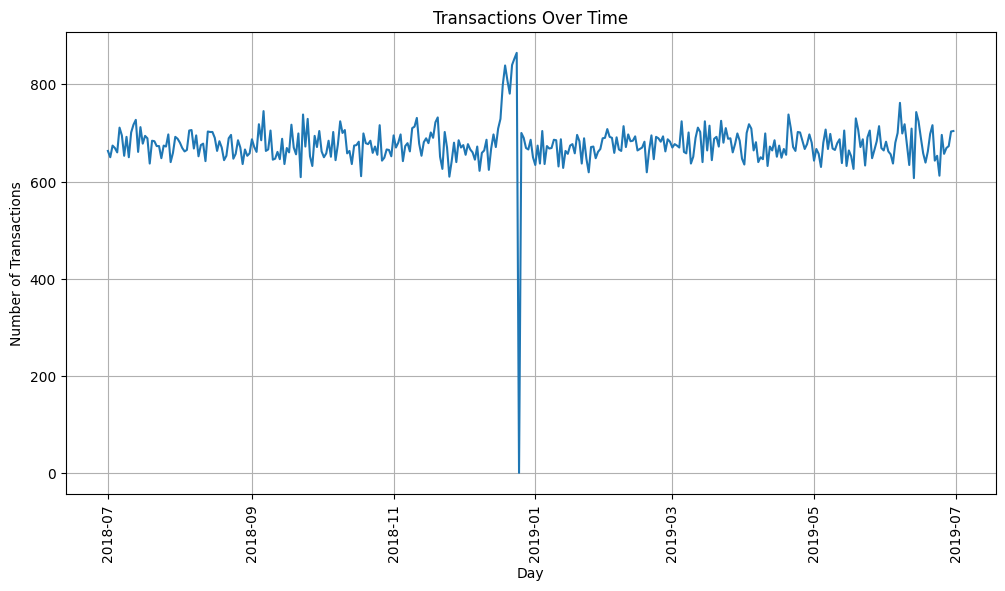

In [ ]:
# Plot transactions over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=transactions_by_day, x='DATE', y='N')
plt.xlabel("Day")
plt.ylabel("Number of Transactions")
plt.title("Transactions Over Time")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

We can see that there is an increase in purchases in December and a break in late
December. Let's zoom in on this.

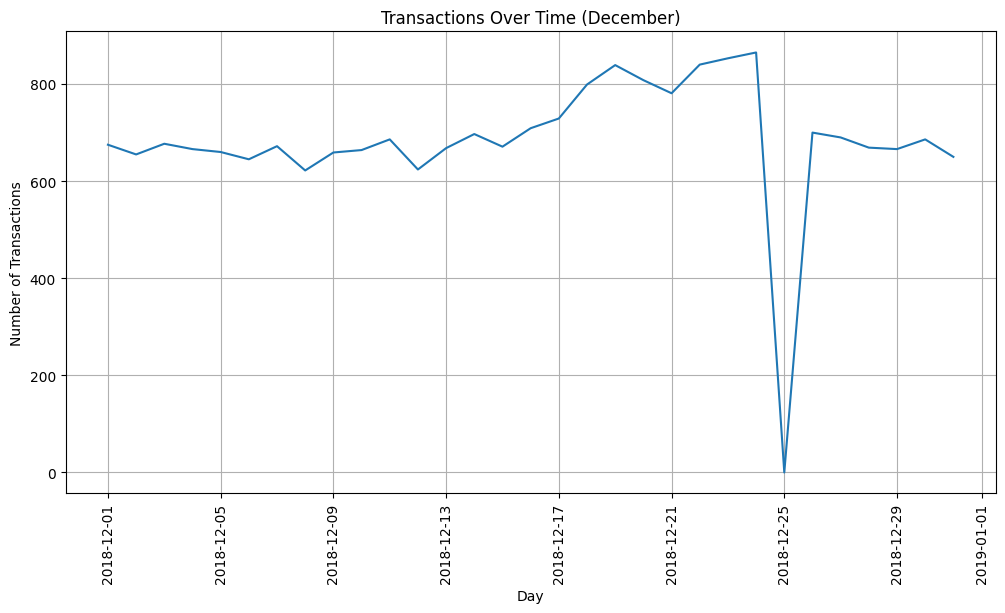

In [ ]:
# Filter to December and look at individual days
december_transactions = transactions_by_day[transactions_by_day['DATE'].dt.month == 12]
plt.figure(figsize=(12, 6))
sns.lineplot(data=december_transactions, x='DATE', y='N')
plt.xlabel("Day")
plt.ylabel("Number of Transactions")
plt.title("Transactions Over Time (December)")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

We can see that the increase in sales occurs in the lead-up to Christmas and that
there are zero sales on Christmas day itself. This is due to shops being closed on
Christmas day.
Now that we are satisfied that the data no longer has outliers, we can move on to
creating other features such as brand of chips or pack size from PROD_NAME. We will
start with pack size.

In [ ]:
# Extract Pack Size by taking the digits from PROD_NAME
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract(r'(\d+)').astype(float)

In [ ]:
# Check if pack sizes are sensible
print(transaction_data['PACK_SIZE'].value_counts().sort_index())

PACK_SIZE
70.0      1507
90.0      3008
110.0    22387
125.0     1454
134.0    25102
135.0     3257
150.0    40203
160.0     2970
165.0    15297
170.0    19983
175.0    66390
180.0     1468
190.0     2995
200.0     4473
210.0     6272
220.0     1564
250.0     3169
270.0     6285
330.0    12540
380.0     6416
Name: count, dtype: int64


The largest size is 380g and the smallest size is 70g - seems sensible!

In [ ]:
# Check first few rows to verify pack size extraction
print(transaction_data.head())

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  
0    Natural Chip        Compny SeaSalt175g         2        6.0      175.0  
1                  CCs Nacho Cheese    175g         3        6.3      175.0  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9      170.0  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0      175.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8      150.0  


Let's plot a histogram of PACK_SIZE since we know that it is a categorical
variable and not a continuous variable even though it is numeric.

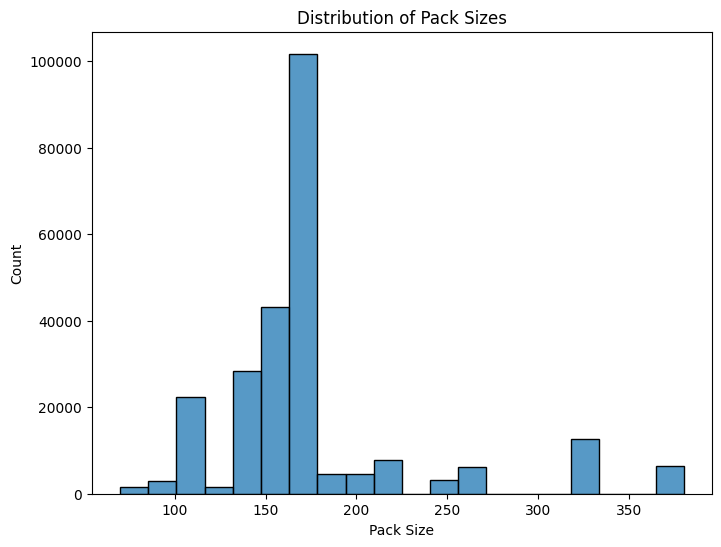

In [ ]:
# Plot histogram of PACK_SIZE
plt.figure(figsize=(8, 6))
sns.histplot(transaction_data['PACK_SIZE'], bins=20, kde=False)
plt.xlabel("Pack Size")
plt.ylabel("Count")
plt.title("Distribution of Pack Sizes")
plt.show()

Pack sizes created look reasonable.
Now to create brands, we can use the first word in PROD_NAME to work out the brand
name

In [ ]:
# Extract Brand Name (first word before the first space in PROD_NAME)
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0].str.upper()

In [ ]:
# Checking brands
brand_counts = transaction_data['BRAND'].value_counts()
print(brand_counts)

BRAND
KETTLE        41288
SMITHS        27390
PRINGLES      25102
DORITOS       22041
THINS         14075
RRD           11894
INFUZIONS     11057
WW            10320
COBS           9693
TOSTITOS       9471
TWISTIES       9454
TYRRELLS       6442
GRAIN          6272
NATURAL        6050
CHEEZELS       4603
CCS            4551
RED            4427
DORITO         3183
INFZNS         3144
SMITH          2963
CHEETOS        2927
SNBTS          1576
BURGER         1564
WOOLWORTHS     1516
GRNWVES        1468
SUNBITES       1432
NCC            1419
FRENCH         1418
Name: count, dtype: int64


Some of the brand names look like they are of the same brands - such as RED and
RRD, which are both Red Rock Deli chips. Let's combine these together.

In [ ]:
# Clean brand names
brand_replacements = {
    "RED": "RRD",
    "SNBTS": "SUNBITES",
    "INFZNS": "INFUZIONS",
    "WW": "WOOLWORTHS",
    "SMITH": "SMITHS",
    "NCC": "NATURAL",
    "DORITO": "DORITOS",
    "GRAIN": "GRNWVES"
}
transaction_data['BRAND'] = transaction_data['BRAND'].replace(brand_replacements)

In [ ]:
# Check updated brands
print(transaction_data['BRAND'].value_counts().sort_index())

BRAND
BURGER         1564
CCS            4551
CHEETOS        2927
CHEEZELS       4603
COBS           9693
DORITOS       25224
FRENCH         1418
GRNWVES        7740
INFUZIONS     14201
KETTLE        41288
NATURAL        7469
PRINGLES      25102
RRD           16321
SMITHS        30353
SUNBITES       3008
THINS         14075
TOSTITOS       9471
TWISTIES       9454
TYRRELLS       6442
WOOLWORTHS    11836
Name: count, dtype: int64


Now that we are happy with the transaction dataset, let's have a look at the
customer dataset.

In [ ]:
# Examine customer data
print(customer_data.info())
print(customer_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
       LYLTY_CARD_NBR
count    7.263700e+04
mean     1.361859e+05
std      8.989293e+04
min      1.000000e+03
25%      6.620200e+04
50%      1.340400e+05
75%      2.033750e+05
max      2.373711e+06


In [ ]:
# Check values of LIFESTAGE and PREMIUM_CUSTOMER
print(customer_data['LIFESTAGE'].value_counts())
print(customer_data['PREMIUM_CUSTOMER'].value_counts())

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64
PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64


In [ ]:
# Merge transaction data with customer data
merged_data = transaction_data.merge(customer_data, on="LYLTY_CARD_NBR", how="left")

As the number of rows in mergedData is the same as that of transactionData, we can be sure that no duplicates were created. This is because we created mergedData by setting how='left' (in other words, a left join) which means take all the rows in transactionData and find rows with matching values in shared columns and then joining the details in these rows to the x or the first mentioned table. Let's also check if some customers were not matched on by checking for nulls.

In [ ]:
# Check for missing values in merged data
print(merged_data['LIFESTAGE'].isna().sum())
print(merged_data['PREMIUM_CUSTOMER'].isna().sum())

0
0


Great, there are no nulls! So all our customers in the transaction data has been
accounted for in the customer dataset.

In [ ]:
# Save the merged data to a CSV file
merged_data.to_csv("QVI_data.csv", index=False)

Data exploration is now complete!

# Data analysis on customer segments

Now that the data is ready for analysis, we can define some metrics of interest to
the client:
- Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment
We could also ask our data team for more information. Examples are:
- The customer's total spend over the period and total spend for each transaction
to understand what proportion of their grocery spend is on chips
- Proportion of customers in each customer segment overall to compare against the
mix of customers who purchase chips.
Let's start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and
plotting the split by these segments to describe which customer segment contribute
most to chip sales.

In [ ]:
# Total sales by LIFESTAGE and PREMIUM_CUSTOMER
sales = merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index()
sales_pivot = sales.pivot(index="LIFESTAGE", columns="PREMIUM_CUSTOMER", values="TOT_SALES")

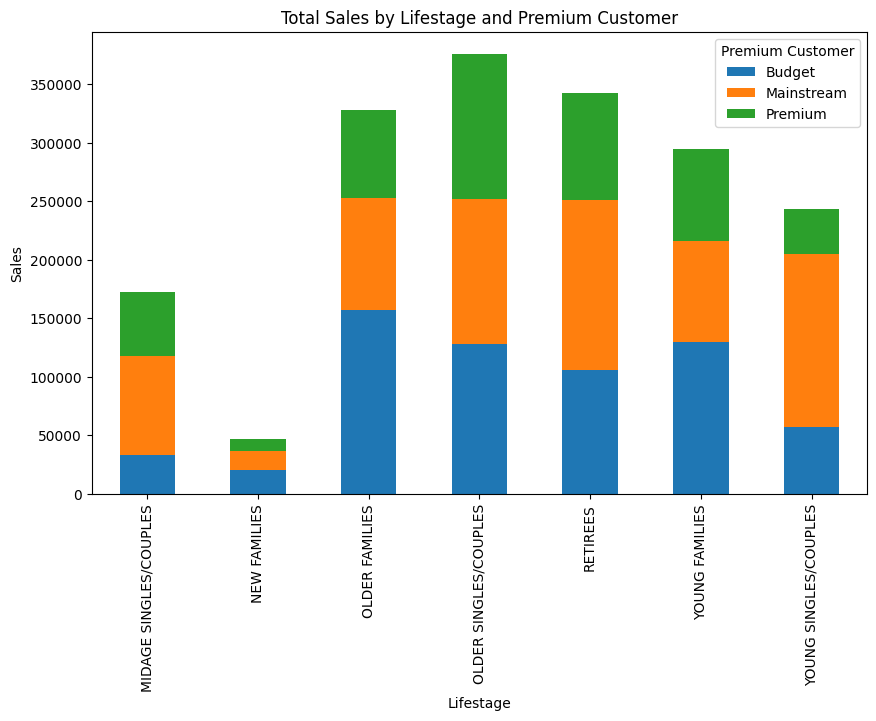

In [ ]:
# Plot sales proportions
sales_pivot.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Total Sales by Lifestage and Premium Customer")
plt.xlabel("Lifestage")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.legend(title="Premium Customer")
plt.show()

Sales are coming mainly from Budget - older families, Mainstream - young
singles/couples, and Mainstream - retirees
Let's see if the higher sales are due to there being more customers who buy chips.

In [ ]:
# Number of customers by LIFESTAGE and PREMIUM_CUSTOMER
customers = merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique().reset_index()
customers_pivot = customers.pivot(index="LIFESTAGE", columns="PREMIUM_CUSTOMER", values="LYLTY_CARD_NBR")

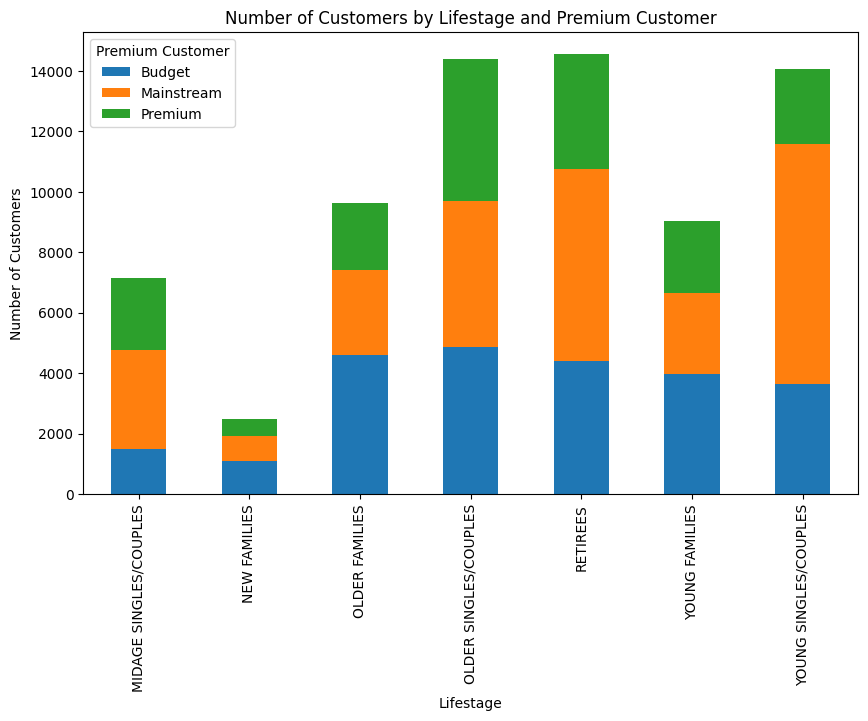

In [ ]:
# Plot customer proportions
customers_pivot.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Number of Customers by Lifestage and Premium Customer")
plt.xlabel("Lifestage")
plt.ylabel("Number of Customers")
plt.xticks(rotation=90)
plt.legend(title="Premium Customer")
plt.show()

There are more Mainstream - young singles/couples and Mainstream - retirees who buy
chips. This contributes to there being more sales to these customer segments but
this is not a major driver for the Budget - Older families segment.

Higher sales may also be driven by more units of chips being bought per customer.
Let's have a look at this next.

In [ ]:
# Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_units = merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).apply(lambda x: x["PROD_QTY"].sum() / x["LYLTY_CARD_NBR"].nunique()).reset_index(name="AVG_UNITS")

<ipython-input-44-658856934339>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_units = merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).apply(lambda x: x["PROD_QTY"].sum() / x["LYLTY_CARD_NBR"].nunique()).reset_index(name="AVG_UNITS")


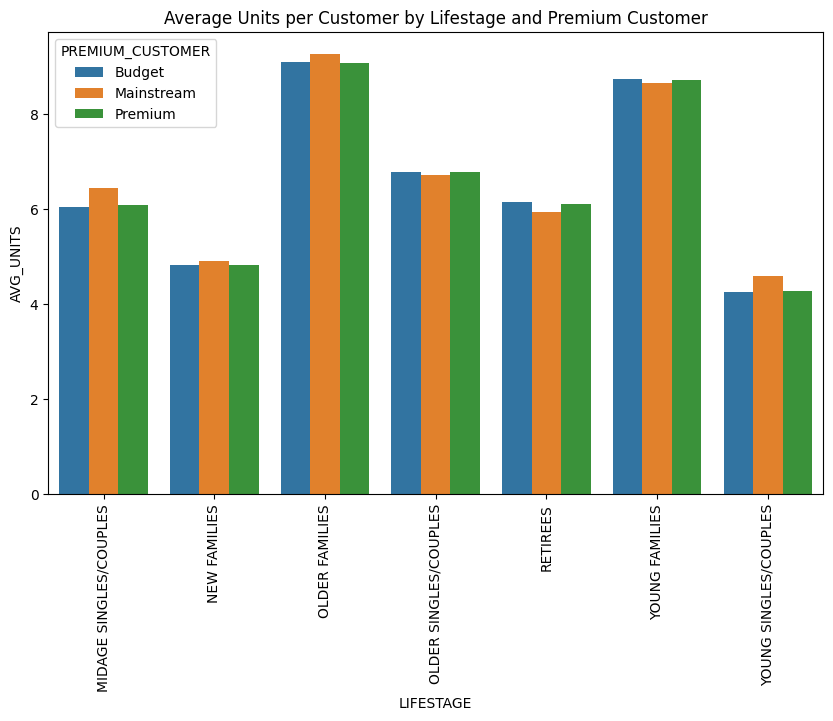

In [ ]:
# Plot average units per customer
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_units, x="LIFESTAGE", y="AVG_UNITS", hue="PREMIUM_CUSTOMER")
plt.title("Average Units per Customer by Lifestage and Premium Customer")
plt.xticks(rotation=90)
plt.show()


Older families and young families in general buy more chips per customer

Let's also investigate the average price per unit chips bought for each customer
segment as this is also a driver of total sales.

In [ ]:
# Average price per unit
merged_data["PRICE_PER_UNIT"] = merged_data["TOT_SALES"] / merged_data["PROD_QTY"]
avg_price = merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PRICE_PER_UNIT"].mean().reset_index()


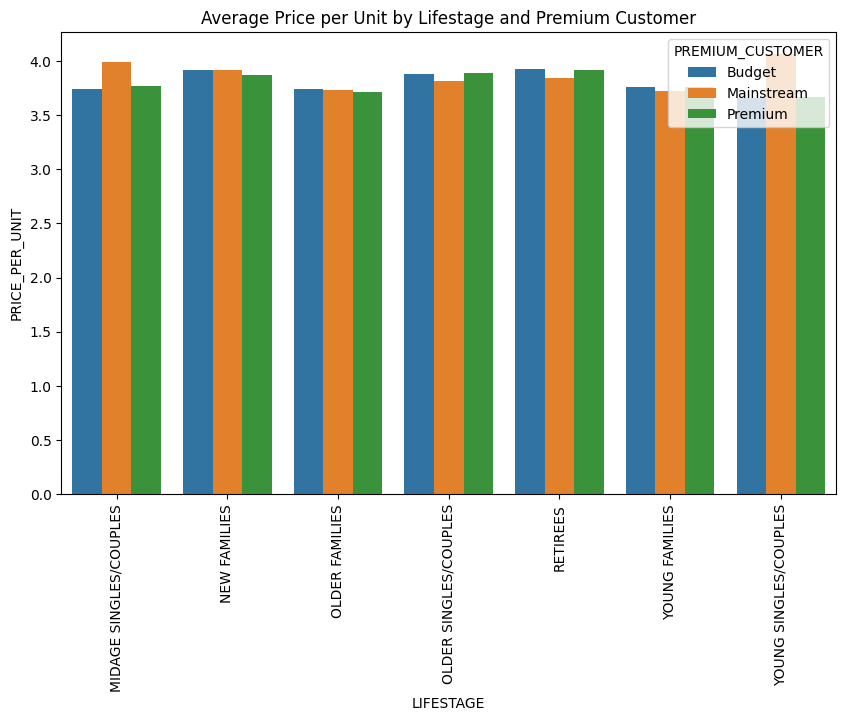

In [ ]:
# Plot average price per unit
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price, x="LIFESTAGE", y="PRICE_PER_UNIT", hue="PREMIUM_CUSTOMER")
plt.title("Average Price per Unit by Lifestage and Premium Customer")
plt.xticks(rotation=90)
plt.show()


Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

As the difference in average price per unit isn't large, we can check if this difference is statistically different.

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
# T-test: Price per unit comparison for Mainstream vs others in Young/Midage Singles/Couples
young_midage_mainstream = merged_data[(merged_data["LIFESTAGE"].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"]))& (merged_data["PREMIUM_CUSTOMER"] == "Mainstream")]["PRICE_PER_UNIT"]
young_midage_others = merged_data[(merged_data["LIFESTAGE"].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])) & (merged_data["PREMIUM_CUSTOMER"] != "Mainstream")]["PRICE_PER_UNIT"]

t_stat, p_value = ttest_ind(young_midage_mainstream, young_midage_others, alternative="greater")
print(f"T-Test: t-stat={t_stat:.4f}, p-value={p_value:.4f}")



T-Test: t-stat=37.8320, p-value=0.0000


The t-test results in a p-value of 0.00, i.e. the unit price for mainstream,
young and mid-age singles and couples ARE significantly higher than
that of budget or premium, young and midage singles and couples.

Deep dive into specific customer segments for insights
We have found quite a few interesting insights that we can dive deeper into.
We might want to target customer segments that contribute the most to sales to
retain them or further increase sales. Let's look at Mainstream - young
singles/couples. For instance, let's find out if they tend to buy a particular
brand of chips.

In [ ]:
# Deep dive into Mainstream Young Singles/Couples
segment1 = merged_data[(merged_data["LIFESTAGE"] == "YOUNG SINGLES/COUPLES") & (merged_data["PREMIUM_CUSTOMER"] == "Mainstream")]
other = merged_data[~((merged_data["LIFESTAGE"] == "YOUNG SINGLES/COUPLES") & (merged_data["PREMIUM_CUSTOMER"] == "Mainstream"))]


In [ ]:
# Brand affinity comparison
quantity_segment1 = segment1["PROD_QTY"].sum()
quantity_other = other["PROD_QTY"].sum()

brand_proportions = (segment1.groupby("BRAND")["PROD_QTY"].sum() / quantity_segment1).reset_index(name="targetSegment").merge((other.groupby("BRAND")["PROD_QTY"].sum() / quantity_other).reset_index(name="other"),on="BRAND")
brand_proportions["affinityToBrand"] = brand_proportions["targetSegment"] / brand_proportions["other"]
brand_proportions = brand_proportions.sort_values(by="affinityToBrand", ascending=False)
print(brand_proportions)

         BRAND  targetSegment     other  affinityToBrand
18    TYRRELLS       0.031553  0.025692         1.228095
17    TWISTIES       0.046184  0.037877         1.219319
5      DORITOS       0.122761  0.101075         1.214553
9       KETTLE       0.197985  0.165553         1.195897
16    TOSTITOS       0.045411  0.037978         1.195713
11    PRINGLES       0.119420  0.100635         1.186670
4         COBS       0.044638  0.039049         1.143124
8    INFUZIONS       0.064679  0.057065         1.133435
15       THINS       0.060373  0.056986         1.059423
7      GRNWVES       0.032712  0.031188         1.048873
3     CHEEZELS       0.017971  0.018647         0.963753
13      SMITHS       0.096370  0.124584         0.773536
6       FRENCH       0.003948  0.005758         0.685569
2      CHEETOS       0.008033  0.012067         0.665733
12         RRD       0.043810  0.067494         0.649091
10     NATURAL       0.019600  0.030854         0.635241
1          CCS       0.011180  

We can see that :
• Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the
rest of the population
• Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest
of the population
Let’s also find out if our target segment tends to buy larger packs of chips.

In [ ]:
# Preferred pack size comparison
pack_proportions = (segment1.groupby("PACK_SIZE")["PROD_QTY"].sum() / quantity_segment1).reset_index(name="targetSegment").merge((other.groupby("PACK_SIZE")["PROD_QTY"].sum() / quantity_other).reset_index(name="other"),on="PACK_SIZE")
pack_proportions["affinityToPack"] = pack_proportions["targetSegment"] / pack_proportions["other"]
pack_proportions = pack_proportions.sort_values(by="affinityToPack", ascending=False)
print(pack_proportions)

    PACK_SIZE  targetSegment     other  affinityToPack
17      270.0       0.031829  0.025096        1.268287
19      380.0       0.032160  0.025584        1.257030
18      330.0       0.061284  0.050162        1.221717
4       134.0       0.119420  0.100635        1.186670
2       110.0       0.106280  0.089791        1.183637
14      210.0       0.029124  0.025121        1.159318
5       135.0       0.014769  0.013075        1.129511
16      250.0       0.014355  0.012781        1.123166
9       170.0       0.080773  0.080986        0.997370
6       150.0       0.157598  0.163421        0.964372
10      175.0       0.254990  0.270007        0.944382
8       165.0       0.055652  0.062268        0.893757
12      190.0       0.007481  0.012442        0.601271
11      180.0       0.003589  0.006067        0.591538
7       160.0       0.006404  0.012373        0.517616
1        90.0       0.006349  0.012580        0.504698
3       125.0       0.003009  0.006037        0.498442
13      20

In [ ]:
# Checking product names for a specific pack size
print(merged_data[merged_data["PACK_SIZE"] == 270]["PROD_NAME"].unique())

['Twisties Cheese     270g' 'Twisties Chicken270g']


Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of
purchasing Twisties.

# Conclusion
Let’s recap what we’ve found!
- Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream retirees shoppers.
- We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers.
- Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
- We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips
compared to the rest of the population.
- The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments where young singles and couples frequent more often to increase visibilty and impulse behaviour.
- Quantium can help the Category Manager with recommendations of where these segments are and further help them with measuring the impact of the changed placement. We’ll work on measuring the impact of trials in the next task and putting all these together in the third task.